<a href="https://colab.research.google.com/github/Geek-a-Byte/ML-sessional/blob/main/lab7/deepLearning_Using_FunctionalAPI_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Setting Up The Model Architecture

In [1]:
# Importing the libraries that we will be using for building the neural network
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# importing the classes for building the neural network layers
from keras.layers import Dense,Input

In [4]:
from os import name
initialiezer=tf.keras.initializers.RandomUniform(minval=0.0005, maxval=1, seed=100)

input= Input(shape=2)

x=Dense(units=10,use_bias=True,activation='relu',kernel_initializer=initialiezer,name="firstDenseLayer")(input)
x=Dense(units=10,use_bias=True,activation='relu',kernel_initializer=initialiezer)(x)
x1=Dense(units=10,use_bias=True,activation='relu',kernel_initializer=initialiezer)(x)
x2=Dense(units=10,use_bias=True,activation='relu',kernel_initializer=initialiezer)(x)
out1=Dense(units=1,use_bias=True,activation='relu',kernel_initializer=initialiezer)(x1)
out2=Dense(units=1,use_bias=True,activation='relu',kernel_initializer=initialiezer)(x2)



In [5]:
x

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>

In [6]:
from keras.models import Model

In [7]:
model=Model([input],[out1,out2])

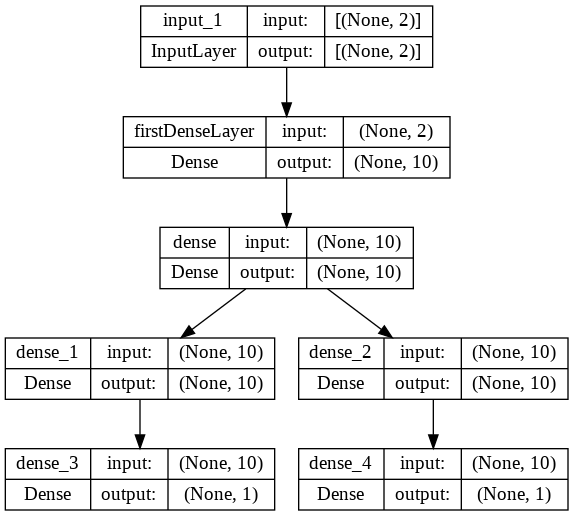

In [8]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [9]:
path='/content/drive/MyDrive/CSE 442/DataDeepLearning.csv'

In [10]:
import pandas
inputDataFrame=pandas.read_csv(path)
inputDataFrame

,x1,x2,y1=4*x1+5*x2+5,y2=10*x1+10*x2,y3=3*x1+10*x2
0,80,58,615,1380,820
1,19,87,516,1060,927
2,81,4,349,850,283
3,25,34,275,590,415
4,8,63,352,710,654
...,...,...,...,...,...
994,49,8,241,570,227
995,23,90,547,1130,969
996,85,23,460,1080,485
997,42,18,263,600,306


In [11]:
# Getting the data out as numpy arrays
x1s=inputDataFrame['x1'].to_numpy()
x2s=inputDataFrame['x2'].to_numpy()
y1s=inputDataFrame['y1=4*x1+5*x2+5'].to_numpy()
y2s=inputDataFrame['y2=10*x1+10*x2'].to_numpy()
y3s=inputDataFrame['y3=3*x1+10*x2'].to_numpy()

In [12]:
x1s.shape

(999,)

In [13]:
x1s=x1s.reshape(x1s.shape[0],1)
x2s=x2s.reshape(x2s.shape[0],1)


In [14]:
x1s.shape

(999, 1)

In [15]:
x=np.concatenate((x1s,x2s),axis=1)

In [16]:
x

array([[80, 58],
       [19, 87],
       [81,  4],
       ...,
       [85, 23],
       [42, 18],
       [94, 52]])

In [17]:
import sklearn
from sklearn.model_selection import train_test_split
xTrain, xTest, y2sTrain, y2sTest, y3sTrain, y3sTest = train_test_split(x,y2s,y3s, test_size=0.20, random_state=42)

In [18]:
print(f'the shape of xTrain = {xTrain.shape}')
print(f'the shape of y2sTrain = {y2sTrain.shape}')
print(f'the shape of y2sTrain = {y3sTrain.shape}')
print(f'the shape of xTrain = {xTest.shape}')
print(f'the shape of y2sTrain = {y2sTest.shape}')
print(f'the shape of y2sTrain = {y3sTest.shape}')


the shape of xTrain = (799, 2)
the shape of y2sTrain = (799,)
the shape of y2sTrain = (799,)
the shape of xTrain = (200, 2)
the shape of y2sTrain = (200,)
the shape of y2sTrain = (200,)


In [19]:
# configure the training
model.compile(loss='mse',metrics=['mse','mae'],optimizer=tf.optimizers.Adam(learning_rate=0.01))

In [20]:
# train the model. just run a few epochs for this test run. you can adjust later.
history=model.fit(x=xTrain,y=[y2sTrain,y3sTrain],validation_data=(xTest,[y2sTest,y3sTest]),batch_size=256, epochs=300)

Epoch 1/300
4/4 [==============================] - 2s 181ms/step - loss: 91089352.0000 - dense_3_loss: 33157594.0000 - dense_4_loss: 57931752.0000 - dense_3_mse: 33157594.0000 - dense_3_mae: 5261.5996 - dense_4_mse: 57931752.0000 - dense_4_mae: 6954.4995 - val_loss: 52179072.0000 - val_dense_3_loss: 17961238.0000 - val_dense_4_loss: 34217836.0000 - val_dense_3_mse: 17961238.0000 - val_dense_3_mae: 3929.1414 - val_dense_4_mse: 34217836.0000 - val_dense_4_mae: 5419.3701
Epoch 2/300
4/4 [==============================] - 0s 25ms/step - loss: 43776116.0000 - dense_3_loss: 14745667.0000 - dense_4_loss: 29030446.0000 - dense_3_mse: 14745667.0000 - dense_3_mae: 3492.9080 - dense_4_mse: 29030446.0000 - dense_4_mae: 4903.0996 - val_loss: 24227916.0000 - val_dense_3_loss: 7531714.5000 - val_dense_4_loss: 16696201.0000 - val_dense_3_mse: 7531714.5000 - val_dense_3_mae: 2529.1069 - val_dense_4_mse: 16696201.0000 - val_dense_4_mae: 3765.2219
Epoch 3/300
4/4 [==============================] - 0s 17m

In [21]:
input=xTest[60].reshape(1,2)
output=model.predict(input)

1/1 [==============================] - 0s 100ms/step


In [22]:
input

array([[68, 84]])

In [23]:
y2sTest[60]

1520

In [24]:
y3sTest[60]

1044

In [25]:
output

[array([[1523.799]], dtype=float32), array([[1029.2394]], dtype=float32)]